In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

# PC anchor

In [5]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'pc', 'bandpass_only', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
pd.options.display.max_rows = 999
output_df = df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]
output_df

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.490854        0.491033     0.490637  0.486012
       b             0.500269        0.500182     0.499726  0.494592
       c             0.513115        0.513435     0.512925  0.508320
       d             0.509214        0.509347     0.509010  0.506342
       e             0.527690        0.529799     0.528308  0.522667
       f             0.485664        0.486006     0.484940  0.480566
       g             0.498442        0.498290     0.498481  0.493862
       h             0.477545        0.476416     0.477179  0.472234
0      a             0.505880        0.505669     0.505470  0.501825
       b             0.518663        0.518827     0.518104  0.512794
       c             0.496781        0.496222     0.496597  0.491125
       d             0.508381        0.508325     0.508213  0.503960
       e             0.483249        0.482789     0.483018  0.477096
       f             0.478676        0.477929     0.478218  0.473692
       g             0.480425        0.479287     0.480439  0.476564
       h             0.483107        0.482689     0.483942  0.477377
1      a             0.521862        0.521654     0.521797  0.516428
       b             0.491952        0.491341     0.491856  0.487338
       c             0.489981        0.489779     0.490258  0.487003
       d             0.485298        0.484008     0.485326  0.479845
       e             0.521535        0.522698     0.521770  0.516301
       f             0.500314        0.500303     0.500172  0.496410
       g             0.489396        0.488872     0.489402  0.483932
       h             0.513357        0.513150     0.513269  0.508496
2      a             0.506630        0.508211     0.506514  0.501253
       b             0.473806        0.472326     0.473895  0.468258
       c             0.488642        0.488813     0.488511  0.482659
       d             0.500136        0.500822     0.500314  0.496292
       e             0.494025        0.493162     0.493863  0.488113
       f             0.500661        0.500470     0.500534  0.496558
       g             0.509262        0.509906     0.509003  0.505283
       h             0.483168        0.481184     0.482230  0.477515
3      a             0.498019        0.497826     0.497872  0.493761
       b             0.505687        0.505827     0.505292  0.500898
       c             0.491966        0.491329     0.491493  0.487353
       d             0.525168        0.525592     0.525169  0.519559
       e             0.512336        0.512177     0.512222  0.506738
       f             0.501095        0.500377     0.500894  0.497565
       g             0.488945        0.487803     0.488970  0.484700
       h             0.501770        0.501809     0.501984  0.498988
4      a             0.497141        0.496895     0.497058  0.491675
       b             0.490650        0.490613     0.490332  0.483802
       c             0.486064        0.484926     0.485685  0.479559
       d             0.490589        0.489981     0.490531  0.485789
       e             0.491308        0.491269     0.491452  0.483350
       f             0.498575        0.498397     0.498385  0.492878
       g             0.487469        0.486687     0.486890  0.481374
       h             0.500792        0.501829     0.501205  0.496332
5      a             0.488396        0.487326     0.487954  0.482467
       b             0.499976        0.498011     0.499156  0.493358
       c             0.498948        0.498894     0.498643  0.492413
       d             0.503651        0.503906     0.503599  0.499359
       e             0.510945        0.510582     0.510642  0.506633
       f             0.469933        0.468228     0.469592  0.463261
       g             0.510106        0.510610     0.510165  0.504953
       h             0.500439        0.500138     0.500119  0.495572
6      a      

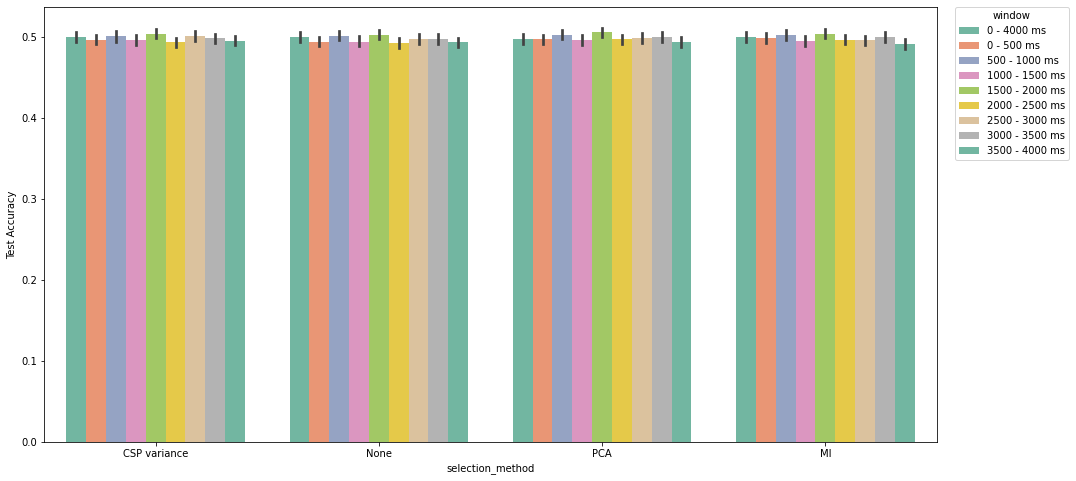

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

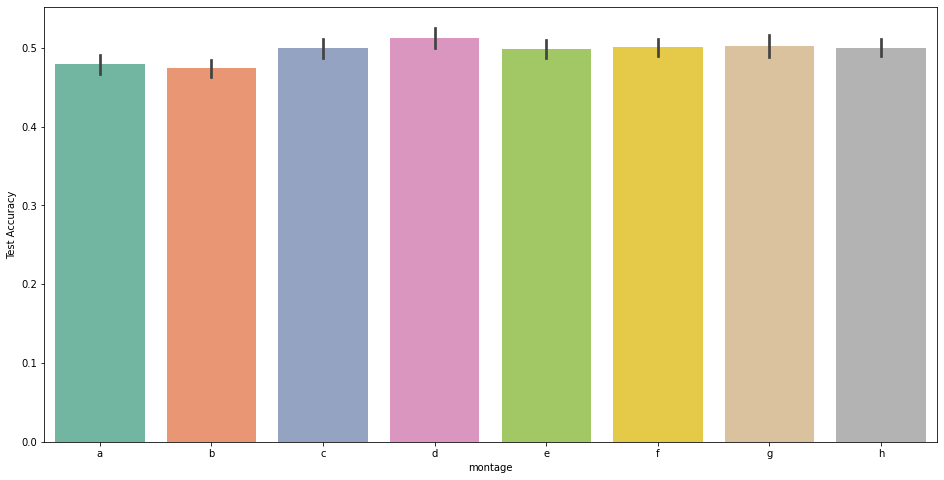

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7')) & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);

# RS anchor

In [55]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'rs', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [57]:
pd.options.display.max_rows = 999
df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.514033        0.513794     0.512831  0.505206
       b             0.492246        0.492673     0.491500  0.485539
       c             0.499179        0.498780     0.499044  0.494894
       d             0.510601        0.511227     0.510452  0.506402
       e             0.488903        0.487347     0.488400  0.481416
       f             0.506288        0.506223     0.506012  0.501059
       g             0.487574        0.487318     0.487716  0.483204
       h             0.501942        0.501085     0.501280  0.496532
0      a             0.499126        0.498081     0.498789  0.488966
       b             0.497343        0.496582     0.496536  0.490990
       c             0.487445        0.484702     0.486611  0.478622
       d             0.482948        0.481175     0.482683  0.473960
       e             0.477884        0.476260     0.477622  0.470567
       f             0.504831        0.506200     0.504694  0.497880
       g             0.486735        0.484970     0.486331  0.478016
       h             0.497484        0.498740     0.496465  0.489351
1      a             0.518199        0.518902     0.517392  0.511382
       b             0.499763        0.498800     0.499705  0.493246
       c             0.473671        0.471860     0.473541  0.468118
       d             0.519938        0.521379     0.519461  0.512155
       e             0.521027        0.521040     0.520815  0.509884
       f             0.508817        0.508916     0.508308  0.503189
       g             0.500286        0.501160     0.499156  0.490449
       h             0.504512        0.505385     0.504065  0.498840
2      a             0.506523        0.506895     0.505630  0.499061
       b             0.502074        0.500594     0.501172  0.494254
       c             0.497795        0.497139     0.497163  0.491431
       d             0.485935        0.484496     0.485452  0.480168
       e             0.504821        0.503995     0.504089  0.498057
       f             0.491232        0.489718     0.491304  0.484104
       g             0.495200        0.493769     0.494384  0.485967
       h             0.482800        0.479588     0.481811  0.474993
3      a             0.484414        0.482109     0.483859  0.476030
       b             0.493259        0.493113     0.492546  0.485983
       c             0.492642        0.491722     0.492145  0.485418
       d             0.483348        0.482732     0.483292  0.477202
       e             0.505099        0.504656     0.504486  0.498391
       f             0.511827        0.512198     0.511452  0.504917
       g             0.482137        0.480806     0.481604  0.475411
       h             0.514927        0.514987     0.514172  0.509324
4      a             0.479855        0.479315     0.479517  0.474457
       b             0.497677        0.496610     0.497347  0.492560
       c             0.499934        0.499950     0.499284  0.493497
       d             0.524610        0.524686     0.524269  0.517311
       e             0.504878        0.505130     0.504245  0.497523
       f             0.500940        0.499785     0.500503  0.492697
       g             0.508582        0.509762     0.507575  0.501389
       h             0.492502        0.490677     0.490332  0.482684
5      a             0.489778        0.489181     0.489658  0.481963
       b             0.509130        0.507302     0.508290  0.499773
       c             0.509330        0.509087     0.508759  0.502715
       d             0.515882        0.517001     0.515504  0.508353
       e             0.508235        0.508497     0.507599  0.502152
       f             0.471530        0.468755     0.471849  0.462246
       g             0.506394        0.506179     0.505417  0.496268
       h             0.502656        0.502633     0.502285  0.496198
6      a      

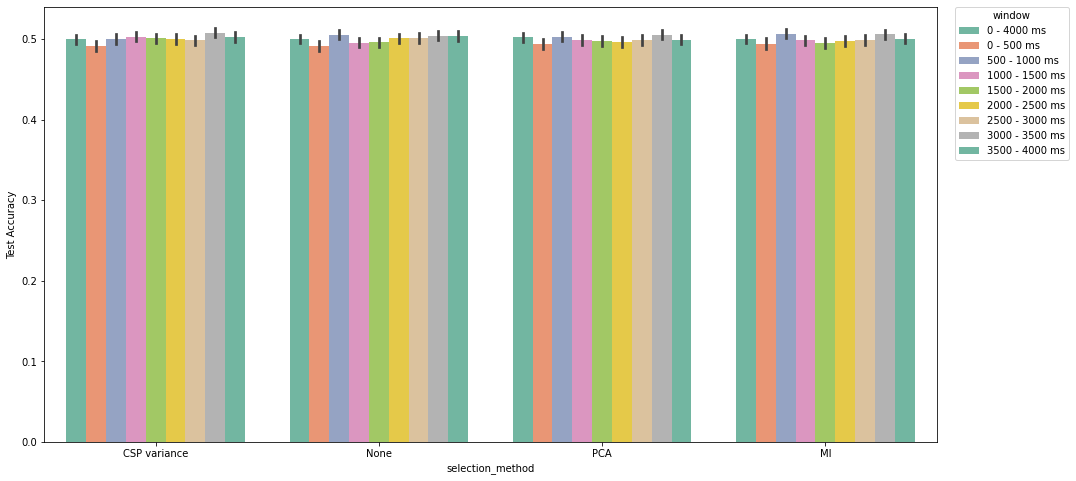

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

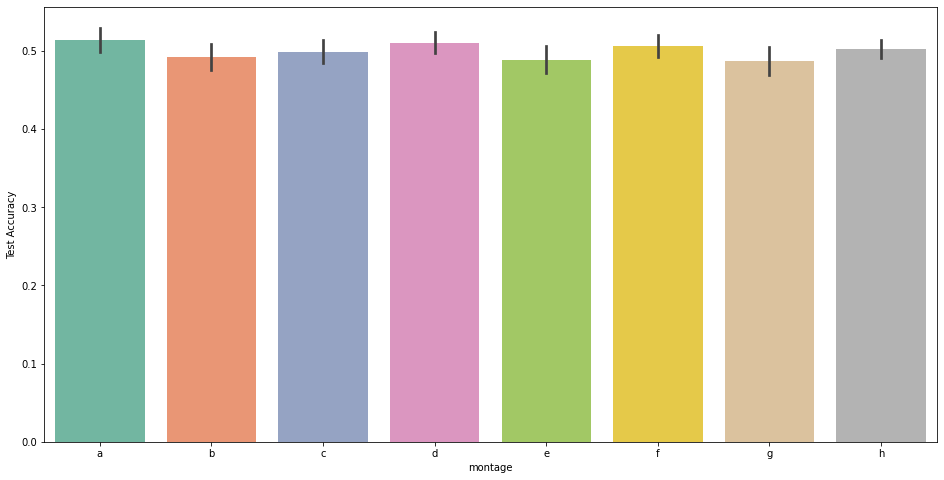

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[(df['window'] == 'all') & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);